<a href="https://colab.research.google.com/github/maxkleiner/maXbox4/blob/master/clusterclass4penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antarctica Learning

Palmer Archipelago (Antarctica) penguin dataset appears to be a drop in replacemnt for the same. It is
a great intro dataset for data exploration & visualization. But the penguins dataset has different
number of samples for each species. It can be observed that unlike the Iris dataset, this data contains
different number of entries for each specie.

What is culmen?
The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using
calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first
feathers depending on the standard chosen.

# Data Exploration

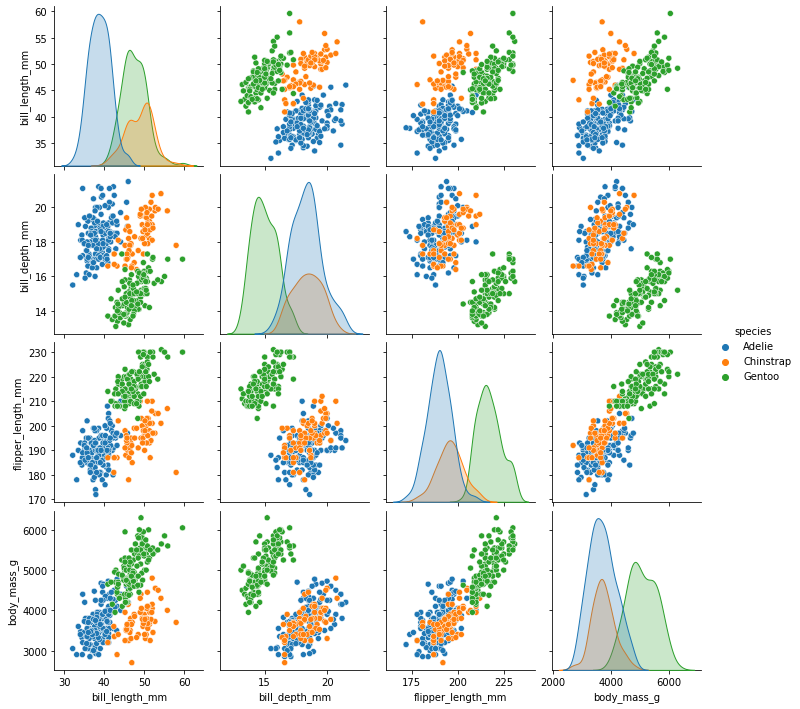

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")
figfile = StringIO()
plt.savefig(figfile, format="svg")
plt.show()
print(df.info())

or alternate data exploration

In [ ]:
#Or alternate
#df = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-
#data/penguins_size.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


So the dataset consists of 7 columns:

• species: penguin species (Chinstrap, Adélie, or Gentoo)

• culmen_length_mm

• culmen depth (mm)

• flipper_length_mm: flipper length (mm)

• body_mass_g: body mass (g)

• island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago
(Antarctica)

• sex: penguin sex


# Preprocessing
We have to preprocess the data otherwise we get an exception: ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
So we clean those NaN and alternate we also can drop a target column:

In [ ]:
print(df.isnull().sum())
df = df.dropna()
# df = df.drop(df[df['species'] == 'Gentoo'].index)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


# Cluster
To get a better understanding we want to cluster the data. 
“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH


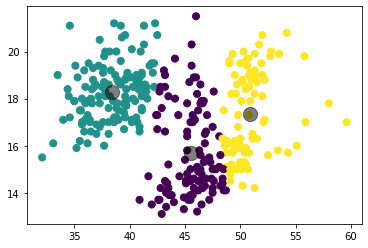

In [ ]:
from sklearn.cluster import KMeans
print("CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH")
X = df[["bill_length_mm","bill_depth_mm"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X.loc[:,"bill_length_mm"], X.loc[:,"bill_depth_mm"],c=y_kmeans,s=50,cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)
plt.show()


# Classify

The scatter plot at the begining (pair plot) from seaborn which shows us the correlation with respect to other features. This method helps just
to figure out the important features which account the most for the classification in our model.
Now I am setting 'species' as the target variable **y** and 3 features as **X** to classify the species: 


In [ ]:
X = df[["bill_length_mm", "bill_depth_mm","flipper_length_mm"]]
y = df["species"]
print(X.shape)
print(y.shape)

(333, 3)
(333,)


In [ ]:
from sklearn import preprocessing
X = preprocessing.scale(X)

#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=13)

# model fitting and prediction
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)
print(pred[1:50])

['Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie']


# Benchmarking
We do have 333 (266) samples with 3 features to classify with a logistic regression, but how good is the performance:

CONFUSION MATRIX
[[63  1  0]
 [ 1 28  0]
 [ 0  0 41]]
CLASSIFICATION REPORT

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        64
   Chinstrap       0.97      0.97      0.97        29
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.99      0.99      0.99       134



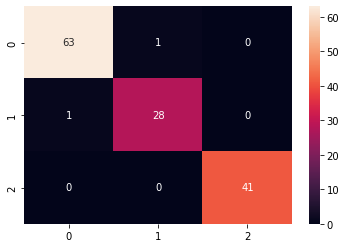

In [ ]:
# checking performance of model

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.show()


A last also difficult check or metric is the ROC. An ROC (Receiver Operating Characteristic) curve is a useful graphical tool to evaluate the performance of a binary classifier as its discrimination threshold is varied. To understand the ROC curve, we should first get familiar with a binary classifier and the confusion matrix. So we can only have to classes as a binary classifier, we drop a specie:

(214, 3)
(214,)
CONFUSION MATRIX
[[57  0]
 [ 1 28]]
ROC CURVE


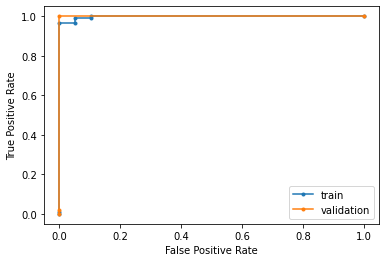

In [ ]:
df = df.drop(df[df['species'] == 'Gentoo'].index)
X = df[["bill_length_mm", "bill_depth_mm","flipper_length_mm"]]
y = df["species"]
print(X.shape)
print(y.shape)
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=13)
model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 0]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1, pos_label='Adelie')

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 0]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1, pos_label='Adelie')

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Evaluate
Evaluating a classier means measuring how accurately the predicted classes or labels match the true labels in the evaluation set. In binary classification, we usually call the smaller and more interesting of the two classes as positive and the larger/other class as negative. In a medical diagnosis problem, the patients who have the disease would typically be the positive and the others would be negative.